In [3]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn import metrics

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from torchvision import datasets

from torch.utils import tensorboard

import pickle

In [4]:
writer = tensorboard.SummaryWriter('runs/experiment_1')

In [5]:
flowers = pd.read_csv("IRIS_ Flower_Dataset.csv")

In [6]:
flowers.head(10)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

In [7]:
flowers.shape #shape of the data

(150, 5)

In [8]:
flowers.describe() #to identify anomalies

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

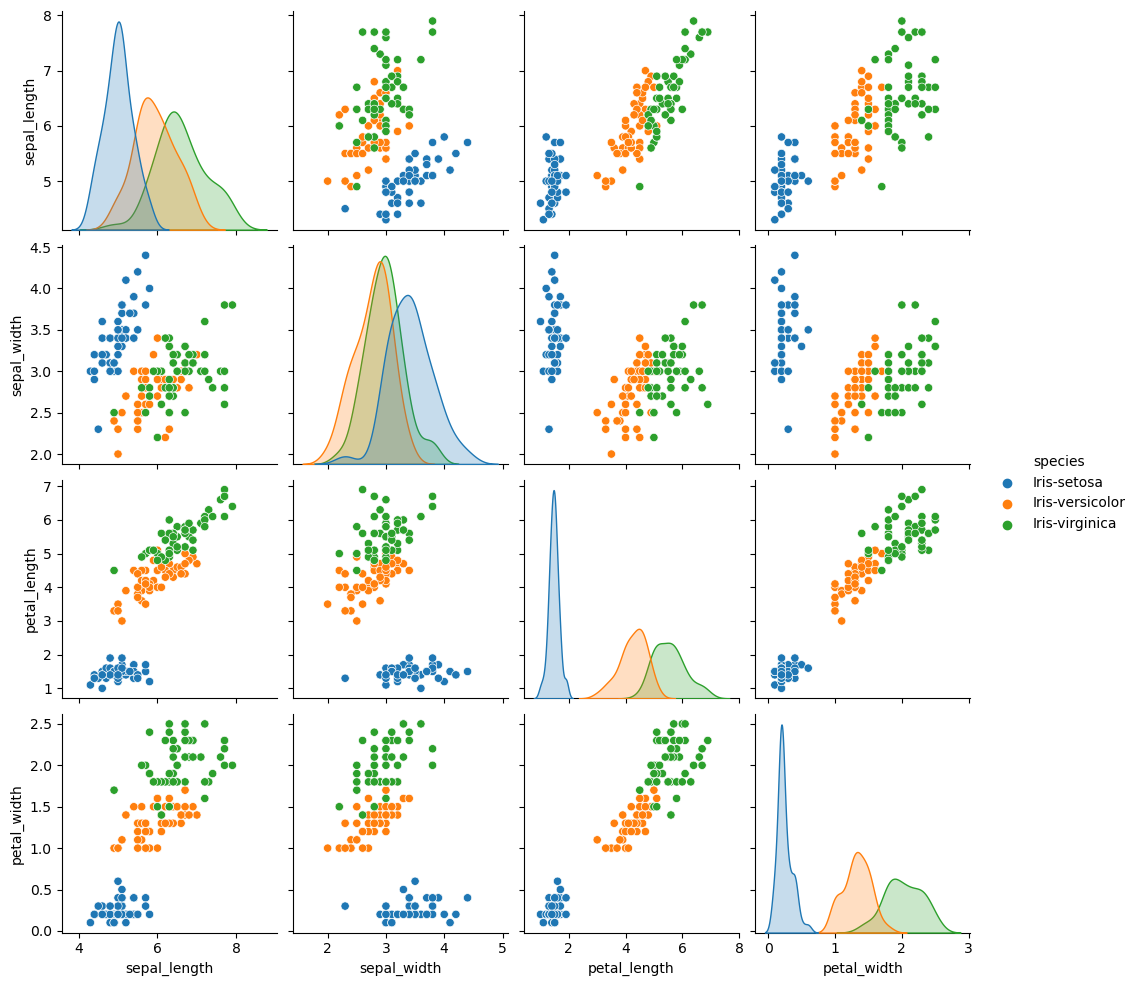

In [9]:
sns.pairplot(flowers, hue='species')


In [10]:
writer.add_figure("PairPlot", plt.gcf())

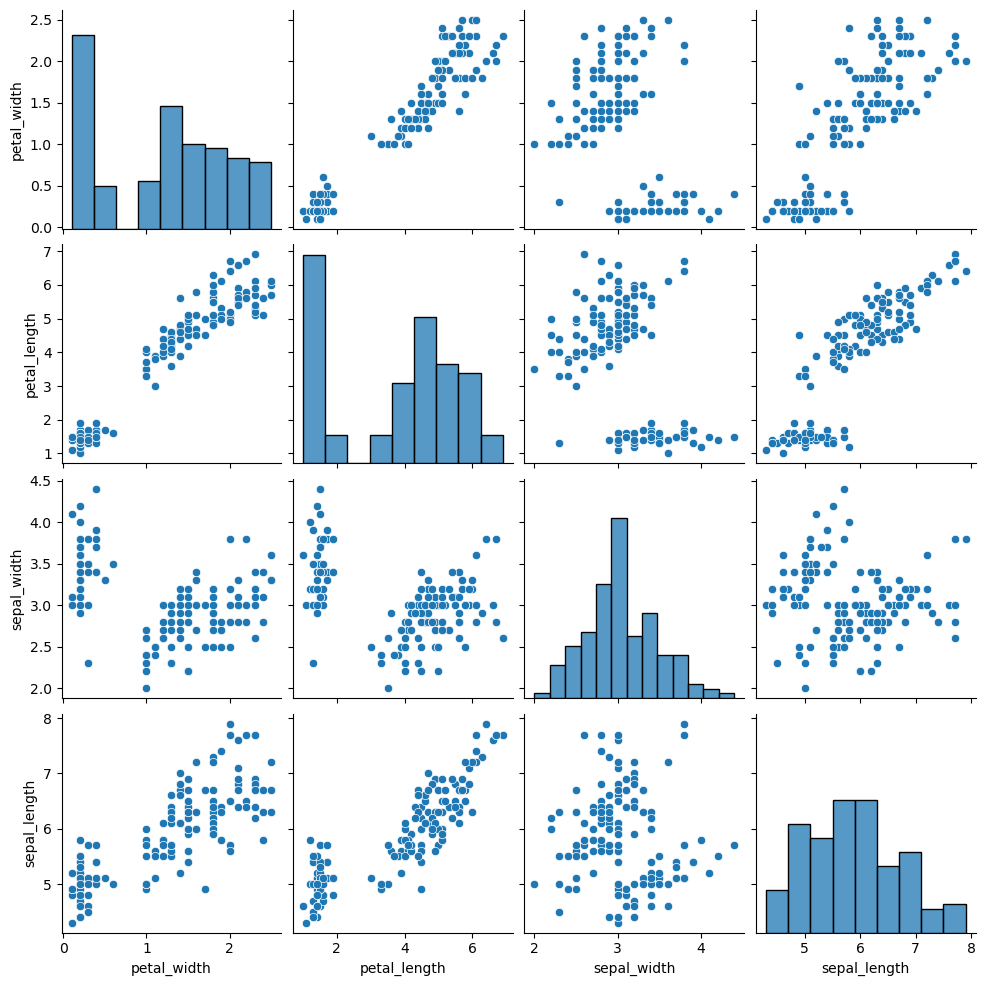

In [11]:
sns.pairplot(flowers[['petal_width', 'petal_length', 'sepal_width', 'sepal_length']])
plt.show()

In [12]:
writer.add_figure("PairPlot 2", plt.gcf())

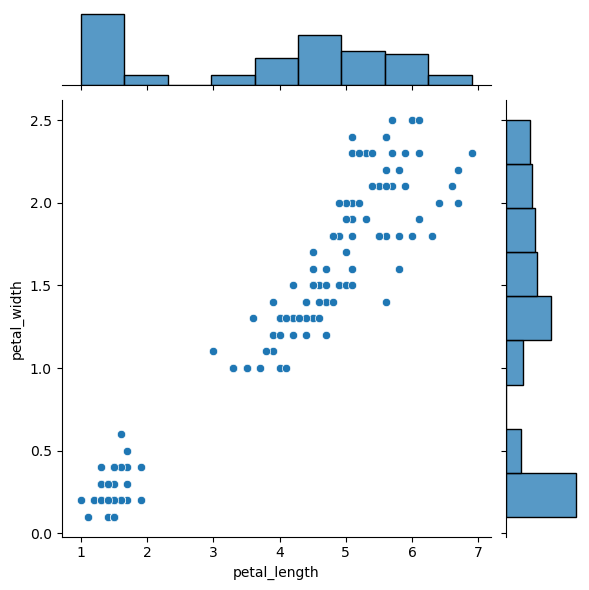

In [13]:
x = flowers.petal_length
y = flowers.petal_width
sns.jointplot(x=x, y=y)
plt.show()

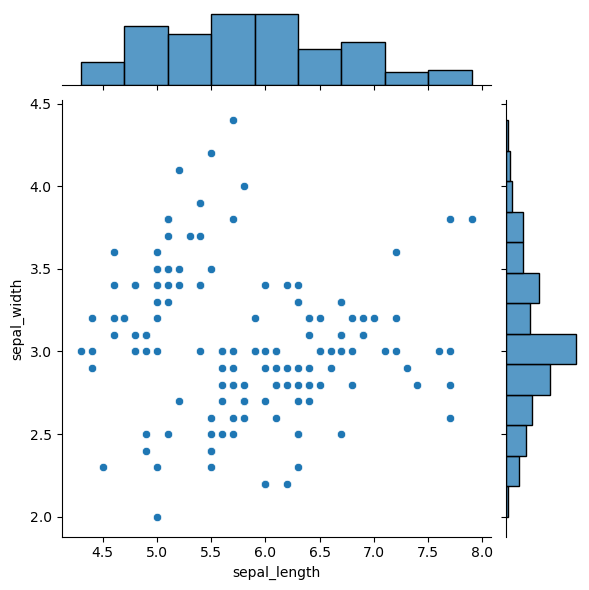

In [14]:
x = flowers.sepal_length
y = flowers.sepal_width
sns.jointplot(x=x, y=y)
plt.show()

In [15]:
#No zeros and no stranges values

In [16]:
#Convert data to arrays

In [17]:
# Species are the values we want to predict
species = flowers['species']
# Remove the species from the flowers
# axis 1 refers to the columns
flowers= flowers.drop('species', axis = 1)

In [18]:
flowers

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [19]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flowers, species, test_size = 0.2, random_state = 42)

In [21]:
X_train.shape

(120, 4)

In [22]:
X_test.shape

(30, 4)

In [23]:
y_train.shape

(120,)

In [24]:
y_test.shape

(30,)

In [25]:
#Model creation :

In [26]:
model= SVC(kernel='linear')

In [27]:
model.fit(X_train, y_train) #MODEL TRAINING

SVC(kernel='linear')

In [28]:
#Model Evaluation

In [29]:
y_pred=model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)

In [31]:
accuracy #how model is precise

1.0

In [32]:
writer = tensorboard.SummaryWriter('models')

In [34]:
#Saving the model
with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(model,f)
print(model)

SVC(kernel='linear')


In [30]:
#Classification Model

In [31]:
print(classification_report(y_test,y_pred)) #Classification report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [32]:
#Color Mapping
color_mapping = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

In [33]:
colors = species.map(color_mapping)

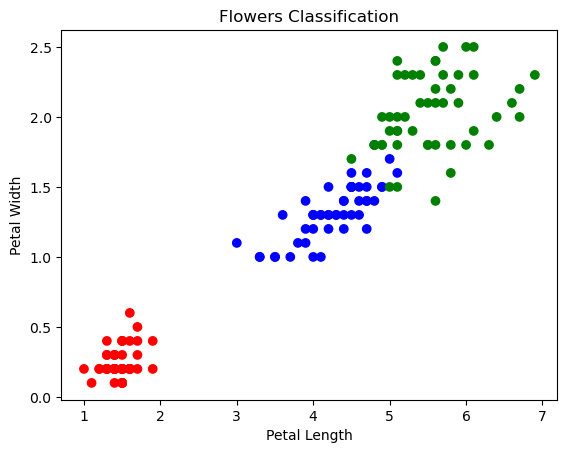

In [34]:
# Visualization with petals
plt.scatter(flowers['petal_length'], flowers['petal_width'], c=colors)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Flowers Classification')
plt.show()
writer.add_figure("Flowers Classification", plt.gcf())

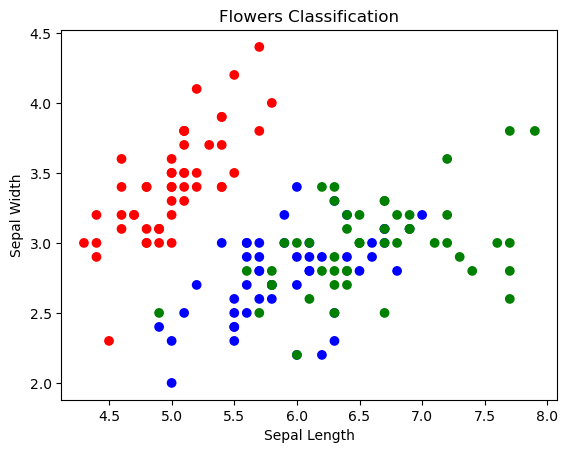

In [35]:
# Visualization with sepals
plt.scatter(flowers['sepal_length'], flowers['sepal_width'], c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Flowers Classification')
plt.show()
writer.add_figure("Flowers Classification with sepals", plt.gcf())